In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import os

In [2]:
types_names = {90:'Ia', 67: '91bg', 52:'Iax', 42:'II', 62:'Ibc', 
               95: 'SLSN', 15:'TDE', 64:'KN', 88:'AGN', 92:'RRL', 65:'M-dwarf',
               16:'EB',53:'Mira', 6:'MicroL', 991:'MicroLB', 992:'ILOT', 
               993:'CART', 994:'PISN',995:'MLString'}


In [3]:
cases = os.listdir('/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/samples/')

In [4]:
#cases.remove('fiducial.csv')
#cases.remove('random.csv')
cases.remove('.ipynb_checkpoints')

# check percentages

In [5]:
for name in cases:

    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/samples/' + name 

    data = pd.read_csv(fname)

    types, freq = np.unique(data['code'].values, return_counts=True)

    print('\n')
    print('case: ' + name)
    for i in range(len(types)):
        print('perc ' + types_names[types[i]] + ' : ', round(freq[i]/data.shape[0], 2))
    print('Total number: ', data.shape[0])
    print('\n')



case: 99SNIa1SNIbc.csv
perc Ibc :  0.01
perc Ia :  0.99
Total number:  3000




case: 75SNIa25SNII.csv
perc II :  0.25
perc Ia :  0.75
Total number:  3000




case: 100SNIa0KN.csv
perc Ia :  1.0
Total number:  3000




case: 94SNIa6AGN.csv
perc AGN :  0.06
perc Ia :  0.94
Total number:  3000




case: 99SNIa1SLSN-I.csv
perc Ia :  0.99
perc SLSN :  0.01
Total number:  3000




case: 95SNIa5SNIbc.csv
perc Ibc :  0.05
perc Ia :  0.95
Total number:  3000




case: perfect.csv
perc Ia :  1.0
Total number:  3000




case: 99SNIa1AGN.csv
perc AGN :  0.01
perc Ia :  0.99
Total number:  3000




case: 98SNIa2AGN.csv
perc AGN :  0.02
perc Ia :  0.98
Total number:  3000




case: 98SNIa2SNII.csv
perc II :  0.02
perc Ia :  0.98
Total number:  3000




case: 90SNIa10SNIbc.csv
perc Ibc :  0.1
perc Ia :  0.9
Total number:  3000




case: fiducial.csv
perc II :  0.03
perc Ibc :  0.0
perc 91bg :  0.0
perc Ia :  0.97
Total number:  3000




case: 97SNIa3SNIax.csv
perc Iax :  0.03
perc Ia :  0.97
Total

In [6]:
cases.remove("100SNIa0KN.csv")
cases.remove("100SNIa0TDE.csv")

In [8]:
names = []

pop_Ia_all = []
pop_nIa_all = []
perc_Ia_all = []
perc_nIa_all = []

wfit_w_all = []
wfit_wsig_all = []
wfit_om_all = []
wfit_omsig_all = []

wfit_w_all_lowz = []
wfit_wsig_all_lowz = []
wfit_om_all_lowz = []
wfit_omsig_all_lowz = []

stan_w_all = []
stan_wsig_all = []
stan_om_all = []
stan_omsig_all = []

stan_w_all_lowz = []
stan_wsig_all_lowz = []
stan_om_all_lowz = []
stan_omsig_all_lowz = []

other_index = []
other_name = []

for case in cases:

    names.append(case[:-4])
    
    pop = {}
    perc = {}

    samples_dir = '/media2/RESSPECT/data/PLAsTiCC/for_metrics/posteriors/WFD/' + case[:-4] + '/'

    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/wfd/samples/' + case
    
    data = pd.read_csv(fname)
    stats = np.unique(data['code'].values, return_counts=True)

    fname_cosmo = case[:-4] + '/results/test_salt2mu_' + case[:-4] + '.M0DIF.cospar'
    cosmofit = pd.read_csv(fname_cosmo, delim_whitespace=True,
                          comment='#', names=['w', 'wsig_marg',  'OM',  'OM_sig',  'chi2',  
                                              'Ndof',  'sigint', 'wran',  'OMran',  'label'])
    wfit_w_all.append(cosmofit['w'].values[0])
    wfit_wsig_all.append(cosmofit['wsig_marg'].values[0])
    wfit_om_all.append(cosmofit['OM'].values[0])
    wfit_omsig_all.append(cosmofit['OM_sig'].values[0])
    
    
    fname_cosmo_lowz = case[:-4] + '/results/test_salt2mu_lowz_withbias_' + case[:-4] + '.M0DIF.cospar'
    cosmofit_lowz = pd.read_csv(fname_cosmo_lowz, delim_whitespace=True,
                          comment='#', names=['w', 'wsig_marg',  'OM',  'OM_sig',  'chi2',  
                                              'Ndof',  'sigint', 'wran',  'OMran',  'label'])
    wfit_w_all_lowz.append(cosmofit_lowz['w'].values[0])
    wfit_wsig_all_lowz.append(cosmofit_lowz['wsig_marg'].values[0])
    wfit_om_all_lowz.append(cosmofit_lowz['OM'].values[0])
    wfit_omsig_all_lowz.append(cosmofit_lowz['OM_sig'].values[0])

    fname_stan = case[:-4] + '/results/stan_summary_' + case[:-4] + '.dat'
    op1 = open(fname_stan, 'r')
    lin1 = op1.readlines()
    op1.close()

    for i in range(len(lin1)):
        if lin1[i].split(' ')[0] == 'om':
            c = 3
            found = False
            while not found:
                if lin1[i].split(' ')[c] != '':
                    stan_om_all.append(lin1[i].split(' ')[c])
                    found=True
                else:
                    c = c + 1
                    
            d = 8
            found2 = False
            while not found2:
                if lin1[i].split(' ')[d] != '':
                    stan_omsig_all.append(lin1[i].split(' ')[d])
                    found2 = True
                else:
                    d = d + 1
        elif lin1[i].split(' ')[0] == 'w':
            c = 3
            found = False
            while not found:
                if lin1[i].split(' ')[c] != '':
                    stan_w_all.append(lin1[i].split(' ')[c])
                    found=True
                else:
                    c = c + 1
                    
            d = 8
            found2 = False
            while not found2:
                if lin1[i].split(' ')[d] != '':
                    stan_wsig_all.append(lin1[i].split(' ')[d])
                    found2 = True
                else:
                    d = d + 1
    
    fname_stan = case[:-4] + '/results/stan_summary_' + case[:-4] + '_lowz_withbias.dat'
    op2 = open(fname_stan, 'r')
    lin2 = op2.readlines()
    op2.close()
    
    for j in range(len(lin2)):
        if lin2[j].split(' ')[0] == 'om':
            stan_om_all_lowz.append(lin2[j].split(' ')[3])
            stan_omsig_all_lowz.append(lin2[j].split(' ')[8])
                
        elif lin2[j].split(' ')[0] == 'w':
            c = 3
            found = False
            while not found:
                if lin2[j].split(' ')[c] != '':
                    stan_w_all_lowz.append(lin2[j].split(' ')[c])
                    found=True
                else:
                    c = c + 1
                        
                     
            d = 8
            found2 = False
            while not found2:
                if lin2[j].split(' ')[d] != '':
                    stan_wsig_all_lowz.append(lin2[j].split(' ')[d])
                    found2 = True
                else:
                    d = d + 1
                        
         
    flag_Ia = np.array(stats[0]) == 90
    pop[90] = stats[1][flag_Ia][0]
    perc[90] = round(100 * stats[1][flag_Ia][0]/data.shape[0])
    
    if  len(stats[0]) == 2:
        other_code = [item for item in stats[0] if item !=90][0]
        pop[other_code] = stats[1][flag_Ia][0]
        perc[other_code] = round(100 * stats[1][flag_Ia][0]/data.shape[0])
            
        pop_nIa_all.append(pop[other_code])
        perc_nIa_all.append(perc[other_code])
        other_index.append(other_code)
        other_name.append(types_names[other_code])
        
    elif len(stats[0]) > 2:
        other_code = [item for item in stats[0] if item !=90]
        for item in range(flag_Ia.shape[0]):
            if not flag_Ia[item]:
                pop[stats[0][item]] = stats[1][item]
                perc[stats[0][item]] = round(100 * stats[1][item]/data.shape[0])
                
        pop_nIa_all.append([pop[item] for item in other_code])
        perc_nIa_all.append([perc[item] for item in other_code])
        other_index.append(other_code)
        other_name.append([types_names[i] for i in other_code])
        
    elif len(stats[0]) == 1:
        other_code = '--'
        pop_nIa_all.append(None)
        perc_nIa_all.append(None)
        other_index.append(None)
        other_name.append(None)

    pop_Ia_all.append(pop[90])
    perc_Ia_all.append(perc[90])

        
        
data_all = {}
data_all['case'] = names
data_all['other_name'] = other_name
data_all['other_code'] = other_index
data_all['nIa'] = pop_Ia_all
data_all['nothers'] = pop_nIa_all
data_all['perc_Ia'] = perc_Ia_all
data_all['perc_others'] = perc_nIa_all
data_all['wfit_w'] = wfit_w_all
data_all['wfit_wsig'] = wfit_wsig_all
data_all['wfit_om'] = wfit_om_all
data_all['wfit_omsig'] = wfit_omsig_all
data_all['stan_w'] = stan_w_all
data_all['stan_wsig'] = stan_wsig_all
data_all['stan_om'] = stan_om_all
data_all['stan_omsig'] = stan_omsig_all
data_all['stan_w_lowz'] = stan_w_all_lowz
data_all['stan_wsig_lowz'] = stan_wsig_all_lowz
data_all['stan_om_lowz'] = stan_om_all_lowz
data_all['stan_omsig_lowz'] = stan_omsig_all_lowz

data_all = pd.DataFrame(data_all)

In [9]:
data_all

,case,other_name,other_code,nIa,nothers,perc_Ia,perc_others,wfit_w,wfit_wsig,wfit_om,wfit_omsig,stan_w,stan_wsig,stan_om,stan_omsig,stan_w_lowz,stan_wsig_lowz,stan_om_lowz,stan_omsig_lowz
0,99SNIa1SNIbc,Ibc,62,2970,2970,99.0,99,-0.550,0.0947,0.3025,0.0507,-1.48,0.13,0.43,0.03,-1.48,0.13,0.44,0.03
1,75SNIa25SNII,II,42,2250,2250,75.0,75,-0.528,0.1026,0.3075,0.0516,-1.49,0.13,0.43,0.03,-1.49,0.13,0.43,0.03
2,94SNIa6AGN,AGN,88,2820,2820,94.0,94,-0.613,0.1146,0.3063,0.0514,-1.4,0.12,0.41,0.03,-1.4,0.13,0.42,0.03
3,99SNIa1SLSN-I,SLSN,95,2970,2970,99.0,99,-0.555,0.0954,0.3025,0.0507,-1.46,0.12,0.43,0.03,-1.47,0.13,0.43,0.03
4,95SNIa5SNIbc,Ibc,62,2850,2850,95.0,95,-0.594,0.1108,0.3075,0.0516,-1.44,0.12,0.42,0.03,-1.44,0.13,0.43,0.03
5,perfect,None,None,3000,None,100.0,None,-0.553,0.0961,0.3038,0.0509,-1.49,0.12,0.43,0.03,-1.49,0.13,0.44,0.03
6,99SNIa1AGN,AGN,88,2970,2970,99.0,99,-0.555,0.0954,0.3025,0.0507,-1.46,0.12,0.43,0.03,-1.47,0.13,0.43,0.03
7,98SNIa2AGN,AGN,88,2940,2940,98.0,98,-0.552,0.0945,0.3013,0.0506,-1.46,0.13,0.43,0.03,-1.47,0.13,0.43,0.03
8,98SNIa2SNII,II,42,2940,2940,98.0,98,-0.553,0.0951,0.3013,0.0506,-1.46,0.13,0.43,0.03,-1.46,0.12,0.43,0.03
9,90SNIa10SNIbc,Ibc,62,2700,2700,90.0,90,-0.556,0.0986,0.3025,0.0507,-1.44,0.12,0.42,0.03,-1.45,0.13,0.43,0.03


In [10]:
data_all.to_csv('summary_cases.csv', index=False)
data_all.to_csv('/media2/RESSPECT2/data/posteriors/WFD/summary_cases_WFD.csv', index=False)

In [11]:
data_all = pd.read_csv('summary_cases.csv', index_col=False)

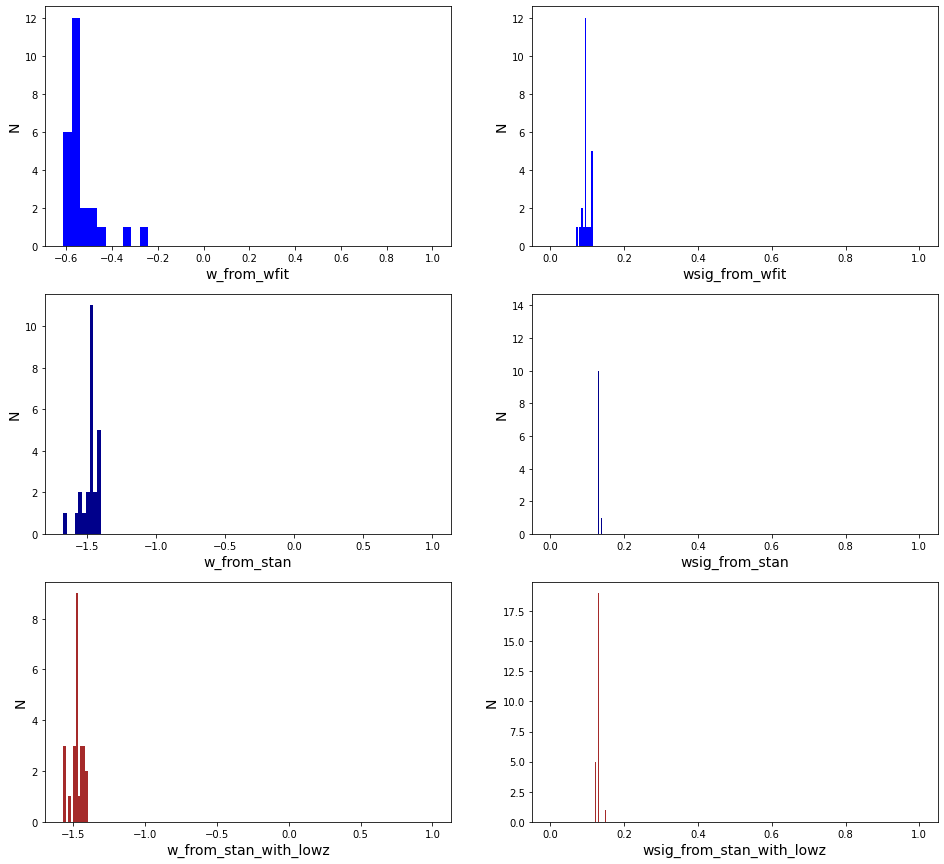

In [12]:
flag_w = data_all['wfit_w'].values < 1000

plt.figure(figsize=(16,15))

plt.subplot(3,2,1)
plt.hist(data_all['wfit_w'][~flag_w], color='darkblue')
plt.hist(data_all['wfit_w'][flag_w], color='blue')
plt.xlabel('w_from_wfit', fontsize=14)
plt.ylabel('N', fontsize=14)


plt.subplot(3,2,2)
plt.hist(data_all['wfit_wsig'][~flag_w], color='darkblue')
plt.hist(data_all['wfit_wsig'][flag_w], color='blue')
plt.xlabel('wsig_from_wfit', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.subplot(3,2,3)
plt.hist(data_all['stan_w'][~flag_w], color='b')
plt.hist(data_all['stan_w'][flag_w], color='darkblue')
plt.xlabel('w_from_stan', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.subplot(3,2,4)
plt.hist(data_all['stan_wsig'][~flag_w], color='b')
plt.hist(data_all['stan_wsig'][flag_w], color='darkblue')
plt.xlabel('wsig_from_stan', fontsize=14)
plt.ylabel('N', fontsize=14)


plt.subplot(3,2,5)
plt.hist(data_all['stan_w_lowz'][~flag_w], color='green', alpha=0.5)
plt.hist(data_all['stan_w_lowz'][flag_w], color='brown')
plt.xlabel('w_from_stan_with_lowz', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.subplot(3,2,6)
plt.hist(data_all['stan_wsig_lowz'][~flag_w], color='green', alpha=0.5)
plt.hist(data_all['stan_wsig_lowz'][flag_w], color='brown')
plt.xlabel('wsig_from_stan_with_lowz', fontsize=14)
plt.ylabel('N', fontsize=14)



plt.show()

In [13]:
def highlight_col(x):
    r = 'background-color: pink'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 5] = r
    
    return df1    

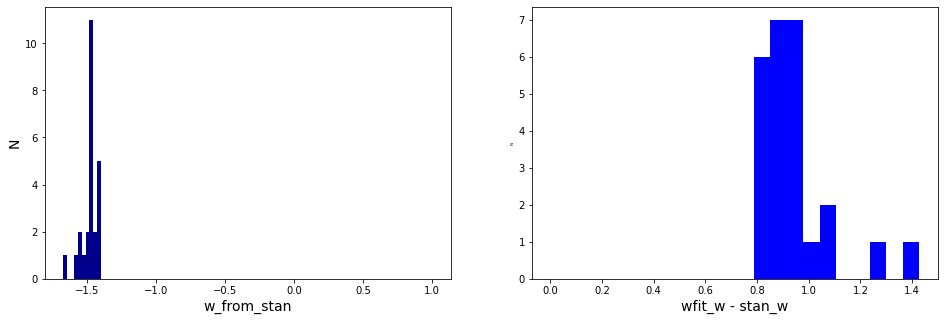

In [14]:
wdiff = data_all['wfit_w'].values - data_all['stan_w'].values

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.hist(data_all['stan_w'][~flag_w], color='b')
plt.hist(data_all['stan_w'][flag_w], color='darkblue')
plt.xlabel('w_from_stan', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.subplot(1,2,2)
plt.hist(wdiff[~flag_w], color='darkblue')
plt.hist(wdiff[flag_w], color='b')
plt.xlabel('wfit_w - stan_w', fontsize=14)
plt.ylabel('N', fontsize=4)

plt.show()

In [33]:
data_all['case']

0         99SNIa1SNIbc
1         75SNIa25SNII
2           94SNIa6AGN
3        99SNIa1SLSN-I
4         95SNIa5SNIbc
5              perfect
6           99SNIa1AGN
7           98SNIa2AGN
8          98SNIa2SNII
9        90SNIa10SNIbc
10        97SNIa3SNIax
11         99SNIa1SNII
12        50SNIa50SNII
13        99SNIa1SNIax
14          95SNIa5AGN
15       98SNIa2SLSN-I
16        98SNIa2SNIax
17         95SNIa5SNII
18    99SNIa1SNIa-91bg
19    98SNIa2SNIa-91bg
20        68SNIa32SNII
21        90SNIa10SNII
22        98SNIa2SNIbc
Name: case, dtype: object

In [ ]:
from astropy.cosmology import FlatLambdaCDM
    
cosmo = FlatLambdaCDM(H0=72, Om0=0.3)
theor_dist = [cosmo.distmod(z).value for z in np.arange(0.001,1.5,0.005)]

for name in cases:

    fpar = name[:-4] + '/results/mu_photoIa_plasticc_' + name[:-4] + '.dat'
    data = pd.read_csv(fpar)
    
    fname = name[:-4] + '/results/' + name[:-4] + '_photoids_plasticc.dat'
    meta = pd.read_csv(fname)
    
    flag = []
    
    for j in range(data.shape[0]):
        
        snname = int(data.iloc[j]['id'])
        flag1 = meta['id'].values == snname
        label = meta['type'][flag1].values[0]
    
        flag.append(label == 'Ia')
        
    flag = np.array(flag)
    
    fig = plt.figure(figsize=(10,8))
        
    ax = fig.add_subplot(111)
    ax.set_title(name, fontsize=26)

    if sum(flag) > 0:
        plt.errorbar(data['z'][flag], data['mu'][flag], yerr=data['mu_err'][flag], fmt='o', alpha=0.1, label='spec-Ia', color='blue')
    
    if sum(~flag) > 0:
        plt.errorbar(data['z'][~flag], data['mu'][~flag], yerr=data['mu_err'][~flag], fmt='^', alpha=0.1, label='photo-Ia', color='green')
       
    plt.plot(np.arange(0.001, 1.5,0.005), theor_dist, label='w = -1', color='red')

    w = str(cosmofit['w'].values[0])
    if len(w) >= 6:
        w1 = w[:6]
    else:
        w1 = w.ljust(6, '0')
            
    werr = str(cosmofit['wsig_marg'].values[0])
    if len(werr) >= 6:
        werr1 = werr[:5]
    else:
        werr1 = werr.ljust(5, '0')
            
    flag_case = data_all['case'].values == name[:-4]
    ax.text(0.2, 32, 'stan = ' + str(data_all[flag_case]['stan_w'].values[0]) + r' $\pm$ ' + str(data_all[flag_case]['stan_wsig'].values[0]), fontsize=20)
    ax.text(0.2, 30, r'wfit = ' + w1 + r' $\pm$ ' + werr1 , fontsize=20)
        
    ax.set_xlabel('redshift', fontsize=22)
    ax.set_ylabel('mu', fontsize=22)
    plt.legend(fontsize=22, loc='lower right')

    plt.savefig('plots/dist_' + name[:-4] + '.png')
    plt.close('all')

In [45]:
fname_lowz = 'perfect/results/test_salt2mu_lowz_withbias_perfect.fitres'
fname_plasticc = 'perfect/results/mu_photoIa_plasticc_perfect.dat'

data = pd.read_csv(fname_lowz, comment='#', delim_whitespace=True)
mu_remove = pd.read_csv(fname_plasticc)

id_mask = np.array([item not in mu_remove['id'].values for item in data['CID'].values])
lowz_orig = data[id_mask][['CID', 'SIM_ZCMB', 'MU', 'MUERR', 'FITPROB']]
lowz = lowz_orig.rename(columns={"CID": "id", "SIM_ZCMB": "z", "MU":"mu", 'MUERR':'mu_err','FITPROB':'fitprob'})

In [47]:
for name in cases:

    fpar = name[:-4] + '/results/mu_photoIa_plasticc_' + name[:-4] + '.dat'
    data = pd.read_csv(fpar)
    
    fname = name[:-4] + '/results/' + name[:-4] + '_photoids_plasticc.dat'
    meta = pd.read_csv(fname)
    
    flag = []
    
    for j in range(data.shape[0]):
        
        snname = int(data.iloc[j]['id'])
        flag1 = meta['id'].values == snname
        label = meta['type'][flag1].values[0]
    
        flag.append(label == 'Ia')
        
    flag = np.array(flag)
    
    fig = plt.figure(figsize=(10,8))
        
    ax = fig.add_subplot(111)
    ax.set_title(name, fontsize=26)

    if sum(flag) > 0:
        data2 = pd.concat([data[flag], lowz], ignore_index=True)
        plt.errorbar(data2['z'], data2['mu'], yerr=data2['mu_err'], fmt='o', alpha=0.1, label='spec-Ia', color='blue')
    
    if sum(~flag) > 0:
        plt.errorbar(data['z'][~flag], data['mu'][~flag], yerr=data['mu_err'][~flag], fmt='^', alpha=0.1, label='photo-Ia', color='green')
       
    plt.plot(np.arange(0.001, 1.5,0.05), theor_dist, label='w = -1', color='red')

    w = str(cosmofit_lowz['w'].values[0])
    if len(w) >= 6:
        w1 = w[:6]
    else:
        w1 = w.ljust(6, '0')
            
    werr = str(cosmofit_lowz['wsig_marg'].values[0])
    if len(werr) >= 6:
        werr1 = werr[:5]
    else:
        werr1 = werr.ljust(5, '0')
            
    flag_case = data_all['case'].values == name[:-4]
    ax.text(0.2, 32, 'stan = ' + str(data_all[flag_case]['stan_w_lowz'].values[0]) + r' $\pm$ ' + \
            str(data_all[flag_case]['stan_wsig_lowz'].values[0]), fontsize=20)
    ax.text(0.2, 30, r'wfit = ' + w1 + r' $\pm$ ' + werr1 , fontsize=20)
        
    ax.set_xlabel('redshift', fontsize=22)
    ax.set_ylabel('mu', fontsize=22)
    plt.legend(fontsize=22, loc='lower right')

    plt.savefig('plots/dist_' + name[:-4] + '_lowz.png')
    plt.close('all')

KeyboardInterrupt: 